In [1]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Bussiness Case - 1 

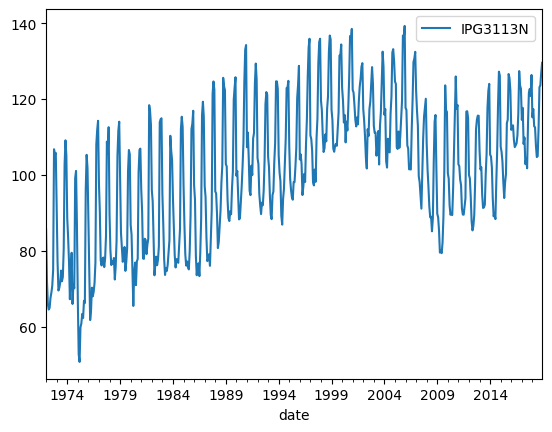

In [2]:


# Load in the time series
candy = pd.read_csv('./data/candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

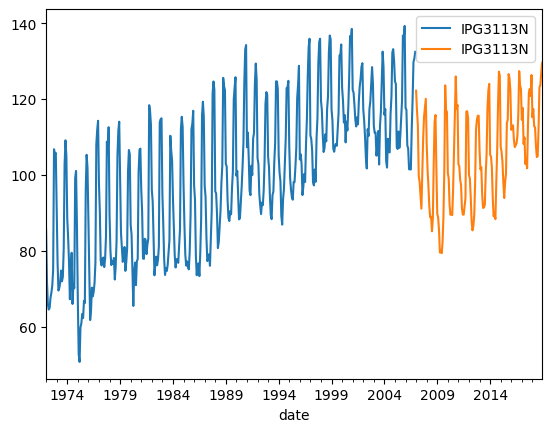

In [3]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax,legend='train')
candy_test.plot(ax=ax,legend='test')
plt.show()

## Testing Stationarity

In [4]:
from toolbox import series_screw as ss

In [5]:
ss.adfuller_eval_sta(candy_train)

'p_value: 0.6356654143166228 não podemos rejeitar Ho. Série Não Estacionária'

# Bussiness Case - 2

In [6]:
earthquakes = candy = pd.read_csv('./data/earthquakes.csv', 
            index_col='date',
            parse_dates=True)


In [7]:
earthquakes.drop(columns='Year',inplace=True)

<AxesSubplot: xlabel='date'>

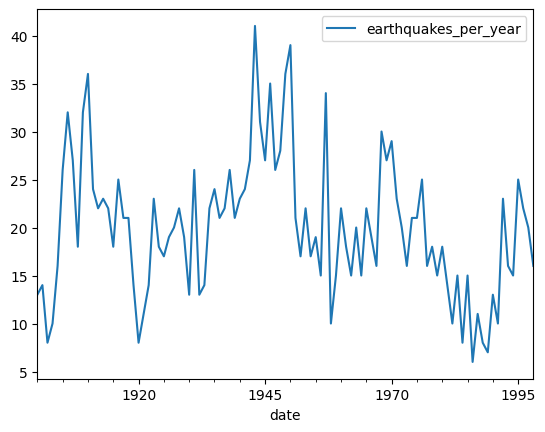

In [8]:
earthquakes.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adfuller(earthquakes)

(-3.183192251191782,
 0.02097842525600371,
 2,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 549.0681467660734)

In [11]:
ss.adfuller_eval_sta(earthquakes)

'p_value: 0.02097842525600371 rejeita-se Ho. Esta séries é estacionária'

# Bussiness Case - 3

In [12]:
amazon = pd.read_csv('./data/amazon_close.csv', 
            index_col='date',
            parse_dates=True)

## Transformação em estacionário

Is it stationary
Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you cannot use ARMA models, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

In [13]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.2035794888112425, 2.331271725487213e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


Commonly used to stock returns

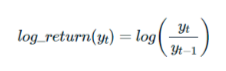

In [14]:
# Calculate log-return and drop nans
amazon_log = np.log(amazon/amazon.shift(-1))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-34.91574853605967, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


# ARMA Model

- **AR**+**MA**

## Creating ARMA data:

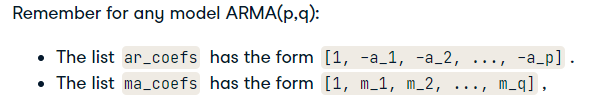

In [15]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample

### MA - Model coef = -0.7

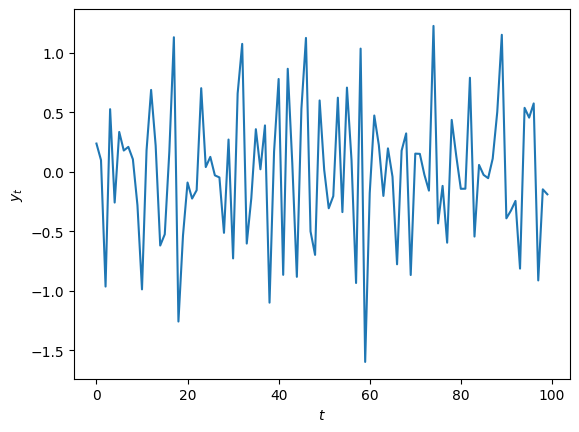

In [16]:
# Set coefficients
ar_coefs = [1]
ma_coefs = [1,-0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

### AR - coefficients of 0.3 and 0.2 respectively

Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively.

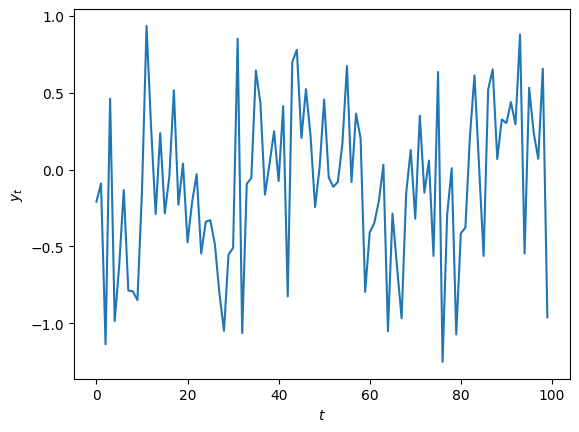

In [17]:
np.random.seed(2)

# Set coefficients
ar_coefs = [1,-0.3,-0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

### ARMA

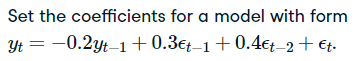

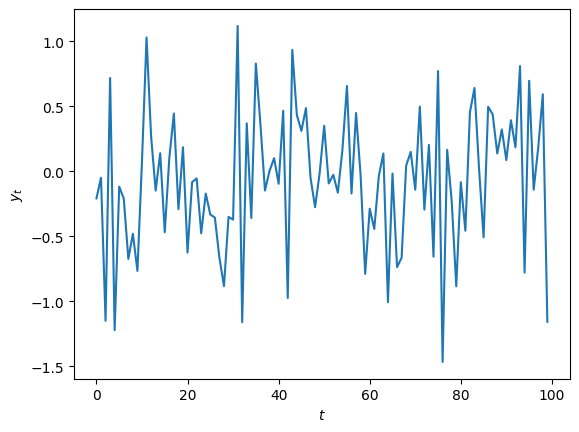

In [18]:
np.random.seed(2)

# Set coefficients
ar_coefs = [1,0.2]
ma_coefs = [1,0.3,0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

# Fitting Data

In [19]:
y = np.array([ 0.34190914,  0.13829197, -0.64945928, -0.65537413, -0.68978958,
       -1.12454144, -1.86127201, -1.37882992, -0.30102186,  0.42481675,
        1.22368808,  1.42363572,  0.96232824, -0.48030637,  0.03565288,
        1.59150471,  1.53113636,  0.81424611,  0.0879735 , -0.24112373,
        0.17427009,  0.07263373, -0.417975  ,  0.11899427,  0.15675439,
       -0.28334493, -0.13649536, -0.16311117, -0.402618  ,  0.31255678,
        0.71995467, -0.7656674 , -0.99826712, -1.17139065, -1.96987948,
       -0.72627994,  0.33287687,  1.14513414,  1.89798507,  1.83951918,
        2.06593831,  0.71756693, -0.51999547, -0.78659096, -0.60668996,
       -0.40955911, -0.12658671, -0.58923554, -1.17155413, -1.56369429,
       -2.00370608, -1.68439416, -0.48329839,  0.81586532,  1.22611453,
        1.01768257,  0.45980738, -0.49905395, -0.15160183,  0.67123982,
        0.01838425, -0.51638427,  0.19485306,  0.46309888, -0.42197727,
       -0.63982125,  0.48956233,  1.23542872,  2.03599236,  1.65394583,
        0.86763182,  0.54464208,  0.34272888, -0.22958483, -0.15583621,
       -0.72411795, -1.60567934, -1.54845567, -1.58041686, -1.27089516,
       -0.20972161,  0.72090272,  1.02185735,  0.6115321 ,  0.56476131,
        0.58748187,  1.48663823,  2.06535053,  2.00243273,  2.01768767,
        1.17295556,  0.82846019,  0.97277989,  0.8065138 ,  0.61837411,
        0.52372123, -0.26309541, -0.70708818,  0.09382882,  0.42640257,
       -0.13769415, -1.33245809, -1.68915512, -1.7471819 , -1.10375575,
        0.13915823,  0.34457329,  0.27448182,  0.51702866,  0.40277662,
        0.56715813,  0.55458773,  0.17365006,  0.65547964,  0.97899584,
        0.05327191, -0.28481483,  0.22240486, -0.53233418, -1.18182482,
       -0.52025024, -0.21145306,  1.17164486,  2.02572459,  1.28013731,
       -0.26437116,  0.03929047, -0.09578587, -0.35037742,  0.60894163,
        1.78220263,  1.13232188,  0.3866827 ,  0.56500106,  0.96726987,
        0.86589119,  0.95544512,  1.6054438 ,  0.61211447, -0.37599159,
       -1.27691384, -1.6199941 , -0.29011378,  0.70720506,  0.95210122,
        0.94246101,  1.38351042,  0.44517832,  0.25727139,  1.47985308,
        1.77326782,  1.57618708,  1.08076922,  0.27842369, -0.18713854,
       -0.05010889, -0.20077345, -0.57804408,  0.67849776,  1.0079325 ,
        0.59604104,  0.32302576, -0.22104679, -0.09810517,  1.15097634,
        1.6115715 ,  0.78075115,  1.13985449,  0.94737107,  0.06743602,
       -0.44853422, -1.33362123, -0.86380828,  0.80435857,  0.17358113,
       -0.58429631, -0.10662723, -0.49711892, -0.55959179, -0.13296733,
        0.12608651,  0.06243834, -0.34140257, -0.13424201,  0.00478038,
       -0.27621894, -0.61657367, -1.02118792, -1.32718845, -0.46108025,
        0.59256266,  1.54287643,  1.365126  ,  1.12776467,  0.64282131,
        0.13372076,  0.81562982,  1.22853318,  0.65833756,  0.77306845,
        0.17940283,  0.59387281,  0.76551111,  0.96341641,  0.95398675,
        0.32649389, -0.22385996, -0.39908789, -1.24702195, -1.48312575,
       -1.08260666, -0.88305921, -0.73099951, -0.84436361, -0.89654238,
        0.61148186,  1.35030942, -0.66311261, -1.83682898, -1.99200083,
       -1.39430621, -0.57686326, -0.25783371, -0.52824321, -1.14328581,
       -1.04733303, -1.71216986, -1.87125219, -1.34679777, -1.13329249,
       -0.65103996,  0.37301967,  0.75472977, -0.0500129 , -0.55186905,
       -0.61912059, -0.17433609,  0.57145757,  0.97005756,  0.93276493,
        1.25396648,  2.2617973 ,  1.69215622,  0.30872568, -0.56832809,
       -1.06217994, -0.60907086,  0.58578571,  0.31506667,  0.39378166,
       -0.03673557, -1.27100533, -0.6827684 , -0.4539117 ,  0.07582962,
        0.99035443,  0.92579465, -0.01470086, -0.36034918, -0.5993383 ,
       -0.30167768,  0.59671238,  1.8069026 ,  2.60945039,  1.16780075,
        0.07609465, -0.41668023, -0.24069804, -0.046038  ,  0.30635079,
        0.7918695 ,  1.01882696,  2.25382156,  2.64527018,  2.40611663,
        1.98771553,  1.07307085,  0.22277408,  0.14125567,  0.32611225,
        1.1824021 ,  1.0869389 ,  0.65380277,  0.53696191,  0.76508597,
        0.6934151 ,  1.12328526,  0.84254025,  0.53078349,  1.15627221,
        1.00227049,  0.66400157,  0.07466486, -0.83487386, -1.10366748,
       -0.34314086, -0.48280137, -0.75453551, -1.09401748, -0.6431358 ,
        0.09086927,  0.81992228,  1.1514958 ,  0.68072155,  0.2808582 ,
        0.42674347,  0.57378456,  0.47639989, -0.10781441, -0.4757389 ,
        0.13707627,  0.80456204,  0.37988155,  0.71830454,  1.6231057 ,
        1.93152593,  1.88758583,  1.01149335, -0.22713392, -0.64791816,
        0.66473341,  1.47271195,  1.42608505,  1.40475867,  0.57650675,
       -0.87352602, -1.01439986, -1.21162446, -0.79262333,  0.63201681,
        1.02411474,  1.14770458,  1.69660996,  1.07674875, -0.64340866,
       -0.83093439,  0.02947694, -0.04818131, -0.59591127, -0.64360081,
       -0.29332213, -1.26515261, -1.64155807, -0.76869617, -0.29442788,
        0.02687944,  0.6577766 ,  0.75916444,  0.34473106, -0.15362543,
       -0.05091595,  1.01157145,  0.98611119,  0.53759989,  0.00957471,
       -0.8351558 , -0.80551075,  0.21254287,  0.57814817,  1.15317047,
        0.58095549,  0.20030394,  0.7154726 ,  0.76264073,  0.40000413,
        0.91544669,  1.59532613,  1.00794379,  1.74470841,  1.83920204,
        1.17723143,  0.04156263, -0.88770707, -0.38769903, -0.05790427,
       -0.25573758, -1.20554866, -0.47372597,  0.01680288, -0.49810433,
       -0.22750594,  0.34198335,  1.58008987,  0.88275501, -0.15451441,
       -0.1320695 , -0.57507027, -0.48415304,  0.0482015 ,  0.882797  ,
        0.53032474, -0.5375641 , -0.24225755,  0.81025124,  0.781945  ,
       -0.01503097, -0.83302309, -0.27973283,  0.10262642, -0.30323664,
       -0.76195406, -1.5162597 , -1.26412422, -0.70367535, -0.68598531,
       -1.85679001, -0.67520258,  0.5103924 ,  0.07440595,  0.84473653,
        1.4092971 ,  0.91551478, -0.00277682, -0.48983473, -1.37004356,
       -1.87602404, -1.01983581,  0.4699843 ,  0.39126769,  0.21825148,
        0.32604743, -0.50651872, -0.90097734, -0.66313324, -0.13285705,
        1.02201429,  1.6440056 ,  1.06012611,  0.42141977, -0.06552335,
       -0.63071531, -0.76189012, -0.19870338,  0.32840622,  0.22016804,
        0.40945927, -0.10059261, -0.7292198 , -0.78788138, -1.03981831,
       -0.67025872, -0.49405108, -1.195167  , -0.74287506, -0.52297105,
        0.06066654, -0.48266928, -0.93574356, -1.06062125, -1.63331104,
       -1.6320384 , -0.66945249,  0.07452335,  0.3105287 ,  0.17664866,
        0.23138126,  0.61494211,  0.64405726,  0.49760423,  0.04927754,
       -0.19424516, -0.12727334,  0.13403931, -0.44199157, -1.31621388,
       -1.42951522, -1.36882495, -1.32341303, -0.89094721, -0.56206807,
       -0.3186422 , -0.77052752, -0.01647374,  1.16989259,  0.88058167,
        0.59935233,  0.44975919,  0.53457613,  1.25849038,  1.03673632,
        0.38410188,  0.04438528,  0.49359396,  1.24297323,  0.17940775,
       -0.94307295, -0.52777173, -0.59278023, -0.74678701, -0.0557795 ,
        0.56236047,  1.05844267,  0.81771109, -0.03436228, -0.22699133,
       -0.22871379, -0.29461664, -0.356378  ,  0.39063077,  0.20885201])

In [20]:
# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA


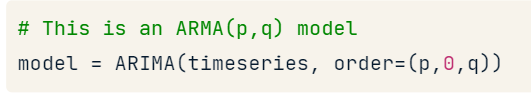

### Earthquake

In [21]:
# Instantiate the model
model = ARIMA(earthquakes, order=(3,0,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(3, 0, 1)   Log Likelihood                -315.673
Date:                  Thu, 26 Jan 2023   AIC                            643.345
Time:                          11:46:43   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6453      2.233      8.798      0.000      15.269      24.022
ar.L1          0.5795      0.645      0.899      0.369      -0.684       1.843
ar.L2          0.0251      0.308    

C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


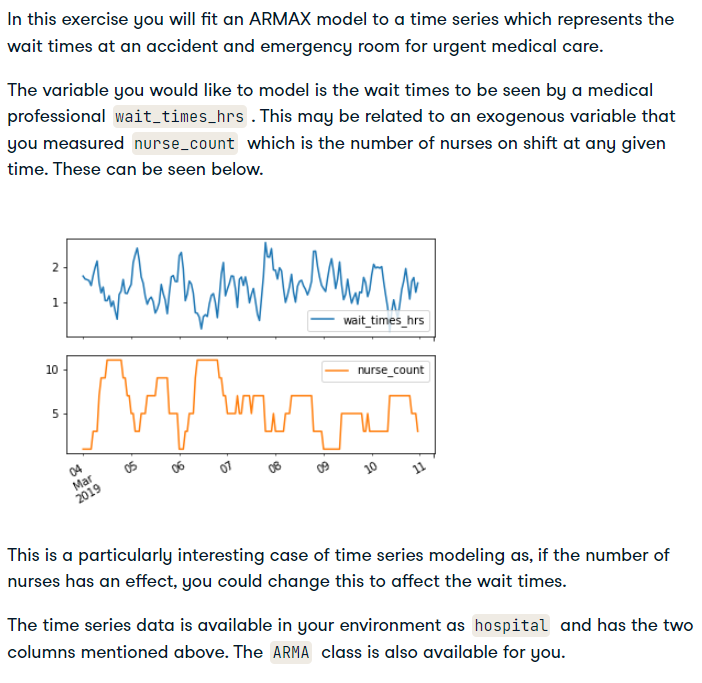

In [22]:
hospital = np.array([['2019-03-04 00:00:00', 1.7472610495733265, 1.0],
       ['2019-03-04 01:00:00', 1.66463435594203, 1.0],
       ['2019-03-04 02:00:00', 1.647046585907327, 1.0],
       ['2019-03-04 03:00:00', 1.619511653458451, 1.0],
       ['2019-03-04 04:00:00', 1.4804148174863567, 1.0],
       ['2019-03-04 05:00:00', 1.765025187586759, 3.0],
       ['2019-03-04 06:00:00', 1.9887080373062391, 3.0],
       ['2019-03-04 07:00:00', 2.1710900839698977, 3.0],
       ['2019-03-04 08:00:00', 1.566777886852151, 7.0],
       ['2019-03-04 09:00:00', 1.2767173722039278, 9.0],
       ['2019-03-04 10:00:00', 1.4403892192757315, 9.0],
       ['2019-03-04 11:00:00', 1.060018960482198, 9.0],
       ['2019-03-04 12:00:00', 1.0579986438704996, 11.0],
       ['2019-03-04 13:00:00', 1.195519894315194, 11.0],
       ['2019-03-04 14:00:00', 0.8939939495639757, 11.0],
       ['2019-03-04 15:00:00', 1.044169082174422, 11.0],
       ['2019-03-04 16:00:00', 0.7669777285345547, 11.0],
       ['2019-03-04 17:00:00', 0.5366243344281322, 11.0],
       ['2019-03-04 18:00:00', 1.230117447008342, 11.0],
       ['2019-03-04 19:00:00', 1.3263157456049883, 11.0],
       ['2019-03-04 20:00:00', 1.652855891408773, 9.0],
       ['2019-03-04 21:00:00', 1.2692238505427826, 9.0],
       ['2019-03-04 22:00:00', 1.2574209447550466, 7.0],
       ['2019-03-04 23:00:00', 1.4016265155363, 7.0],
       ['2019-03-05 00:00:00', 1.5142316930998907, 5.0],
       ['2019-03-05 01:00:00', 2.127436071330744, 5.0],
       ['2019-03-05 02:00:00', 2.350327770963579, 3.0],
       ['2019-03-05 03:00:00', 2.533426155161851, 3.0],
       ['2019-03-05 04:00:00', 2.191820310035871, 3.0],
       ['2019-03-05 05:00:00', 1.722519219307503, 5.0],
       ['2019-03-05 06:00:00', 1.5470378931111204, 5.0],
       ['2019-03-05 07:00:00', 1.1855675540546822, 5.0],
       ['2019-03-05 08:00:00', 0.9575902778518238, 7.0],
       ['2019-03-05 09:00:00', 1.0951064332363845, 7.0],
       ['2019-03-05 10:00:00', 1.1584433575412858, 7.0],
       ['2019-03-05 11:00:00', 1.0287979334844957, 7.0],
       ['2019-03-05 12:00:00', 0.7104917570163609, 7.0],
       ['2019-03-05 13:00:00', 0.8222898301047371, 9.0],
       ['2019-03-05 14:00:00', 0.9988828125310928, 9.0],
       ['2019-03-05 15:00:00', 1.513861423260519, 9.0],
       ['2019-03-05 16:00:00', 1.254190253775842, 9.0],
       ['2019-03-05 17:00:00', 1.0731913187696265, 9.0],
       ['2019-03-05 18:00:00', 0.6910471301162238, 9.0],
       ['2019-03-05 19:00:00', 1.2582172355018, 5.0],
       ['2019-03-05 20:00:00', 1.7255731463980593, 5.0],
       ['2019-03-05 21:00:00', 1.7625437537416648, 5.0],
       ['2019-03-05 22:00:00', 1.5973223657985525, 5.0],
       ['2019-03-05 23:00:00', 1.591365228792751, 5.0],
       ['2019-03-06 00:00:00', 2.3166022164586493, 1.0],
       ['2019-03-06 01:00:00', 2.412687066947711, 1.0],
       ['2019-03-06 02:00:00', 1.9471399820779824, 1.0],
       ['2019-03-06 03:00:00', 1.056742225796595, 3.0],
       ['2019-03-06 04:00:00', 1.244519655934233, 3.0],
       ['2019-03-06 05:00:00', 1.608200001141234, 5.0],
       ['2019-03-06 06:00:00', 1.5257591250207263, 5.0],
       ['2019-03-06 07:00:00', 1.2646835480067904, 5.0],
       ['2019-03-06 08:00:00', 0.7208923796378272, 9.0],
       ['2019-03-06 09:00:00', 0.7052512961078607, 11.0],
       ['2019-03-06 10:00:00', 0.5918230004457548, 11.0],
       ['2019-03-06 11:00:00', 0.2644199649277832, 11.0],
       ['2019-03-06 12:00:00', 0.6081206922257332, 11.0],
       ['2019-03-06 13:00:00', 0.6625754394174586, 11.0],
       ['2019-03-06 14:00:00', 0.6134591995213549, 11.0],
       ['2019-03-06 15:00:00', 0.9683986137774954, 11.0],
       ['2019-03-06 16:00:00', 1.204830464123784, 11.0],
       ['2019-03-06 17:00:00', 1.2569263752227116, 11.0],
       ['2019-03-06 18:00:00', 1.0016798326827605, 11.0],
       ['2019-03-06 19:00:00', 0.5798220869097264, 11.0],
       ['2019-03-06 20:00:00', 1.169968922663578, 9.0],
       ['2019-03-06 21:00:00', 1.8095112330280496, 9.0],
       ['2019-03-06 22:00:00', 2.129909225387839, 7.0],
       ['2019-03-06 23:00:00', 1.19330521709445, 7.0],
       ['2019-03-07 00:00:00', 1.3832059984304546, 5.0],
       ['2019-03-07 01:00:00', 1.542759714018802, 5.0],
       ['2019-03-07 02:00:00', 1.7528574235658785, 5.0],
       ['2019-03-07 03:00:00', 1.7427915387216144, 5.0],
       ['2019-03-07 04:00:00', 1.3933848582270851, 5.0],
       ['2019-03-07 05:00:00', 0.867394968896316, 7.0],
       ['2019-03-07 06:00:00', 1.6572868211254357, 5.0],
       ['2019-03-07 07:00:00', 1.7223371513813026, 5.0],
       ['2019-03-07 08:00:00', 1.481997713229153, 7.0],
       ['2019-03-07 09:00:00', 1.72539318159873, 7.0],
       ['2019-03-07 10:00:00', 1.4481565444299938, 7.0],
       ['2019-03-07 11:00:00', 0.9976675427976184, 7.0],
       ['2019-03-07 12:00:00', 1.2307692292664587, 5.0],
       ['2019-03-07 13:00:00', 1.4019696054769444, 7.0],
       ['2019-03-07 14:00:00', 1.0511848641825188, 7.0],
       ['2019-03-07 15:00:00', 0.6748908446329396, 7.0],
       ['2019-03-07 16:00:00', 0.5004422668410021, 7.0],
       ['2019-03-07 17:00:00', 1.1267812627622569, 7.0],
       ['2019-03-07 18:00:00', 1.7413096813802666, 7.0],
       ['2019-03-07 19:00:00', 2.6905571682395664, 3.0],
       ['2019-03-07 20:00:00', 2.2900918618070447, 3.0],
       ['2019-03-07 21:00:00', 2.277315817797298, 3.0],
       ['2019-03-07 22:00:00', 2.5194189995200107, 3.0],
       ['2019-03-07 23:00:00', 1.919419066795801, 5.0],
       ['2019-03-08 00:00:00', 1.913367227300348, 3.0],
       ['2019-03-08 01:00:00', 1.663299263333983, 3.0],
       ['2019-03-08 02:00:00', 1.982375542202768, 3.0],
       ['2019-03-08 03:00:00', 1.896861312886128, 3.0],
       ['2019-03-08 04:00:00', 1.4025965672883165, 3.0],
       ['2019-03-08 05:00:00', 1.008395787686021, 5.0],
       ['2019-03-08 06:00:00', 1.2053824016505863, 5.0],
       ['2019-03-08 07:00:00', 1.4552105016606032, 5.0],
       ['2019-03-08 08:00:00', 1.7980654467101371, 7.0],
       ['2019-03-08 09:00:00', 1.295826220801441, 7.0],
       ['2019-03-08 10:00:00', 1.0152775807291303, 7.0],
       ['2019-03-08 11:00:00', 1.462663816385514, 7.0],
       ['2019-03-08 12:00:00', 1.5972527256603517, 7.0],
       ['2019-03-08 13:00:00', 1.6302964592002949, 7.0],
       ['2019-03-08 14:00:00', 1.4726650601416242, 7.0],
       ['2019-03-08 15:00:00', 1.3715478537605224, 7.0],
       ['2019-03-08 16:00:00', 1.2199023381525436, 7.0],
       ['2019-03-08 17:00:00', 1.3756811505797448, 7.0],
       ['2019-03-08 18:00:00', 1.6024392135541223, 7.0],
       ['2019-03-08 19:00:00', 2.443666001492963, 3.0],
       ['2019-03-08 20:00:00', 2.448155212748998, 3.0],
       ['2019-03-08 21:00:00', 2.0207195275174223, 3.0],
       ['2019-03-08 22:00:00', 1.7212681006973871, 3.0],
       ['2019-03-08 23:00:00', 1.4899873922102873, 3.0],
       ['2019-03-09 00:00:00', 1.3950932915835537, 1.0],
       ['2019-03-09 01:00:00', 1.3150799032039386, 1.0],
       ['2019-03-09 02:00:00', 1.6912969297321734, 1.0],
       ['2019-03-09 03:00:00', 2.0127009074429587, 1.0],
       ['2019-03-09 04:00:00', 2.2369118620449604, 1.0],
       ['2019-03-09 05:00:00', 1.8603979812486924, 1.0],
       ['2019-03-09 06:00:00', 1.3976060342277072, 1.0],
       ['2019-03-09 07:00:00', 1.668098409760197, 1.0],
       ['2019-03-09 08:00:00', 2.1445910427013226, 1.0],
       ['2019-03-09 09:00:00', 1.5109476218276543, 5.0],
       ['2019-03-09 10:00:00', 1.0858184134614206, 5.0],
       ['2019-03-09 11:00:00', 1.238300867381067, 5.0],
       ['2019-03-09 12:00:00', 1.660296168239458, 5.0],
       ['2019-03-09 13:00:00', 1.276555456903245, 5.0],
       ['2019-03-09 14:00:00', 0.9874438906535378, 5.0],
       ['2019-03-09 15:00:00', 1.1478646119134357, 5.0],
       ['2019-03-09 16:00:00', 1.277081230083097, 5.0],
       ['2019-03-09 17:00:00', 0.957546297969064, 5.0],
       ['2019-03-09 18:00:00', 1.3018922491202451, 5.0],
       ['2019-03-09 19:00:00', 1.28003343540912, 5.0],
       ['2019-03-09 20:00:00', 1.7118187317301947, 3.0],
       ['2019-03-09 21:00:00', 1.5610044752145948, 3.0],
       ['2019-03-09 22:00:00', 1.1695051789768125, 5.0],
       ['2019-03-09 23:00:00', 1.3637582870464806, 3.0],
       ['2019-03-10 00:00:00', 1.7786811221490133, 3.0],
       ['2019-03-10 01:00:00', 2.0789883842682157, 3.0],
       ['2019-03-10 02:00:00', 1.972132811798179, 3.0],
       ['2019-03-10 03:00:00', 2.0022671049574363, 3.0],
       ['2019-03-10 04:00:00', 1.9706234915384973, 3.0],
       ['2019-03-10 05:00:00', 2.0151404226023857, 3.0],
       ['2019-03-10 06:00:00', 1.5894353933734853, 3.0],
       ['2019-03-10 07:00:00', 1.2110379922991672, 3.0],
       ['2019-03-10 08:00:00', 0.8615199277580669, 3.0],
       ['2019-03-10 09:00:00', 0.1905571682395663, 7.0],
       ['2019-03-10 10:00:00', 0.7568464293987587, 7.0],
       ['2019-03-10 11:00:00', 1.0816318861468954, 7.0],
       ['2019-03-10 12:00:00', 0.8028307145371512, 7.0],
       ['2019-03-10 13:00:00', 0.5727794134144623, 7.0],
       ['2019-03-10 14:00:00', 0.9429501668118844, 7.0],
       ['2019-03-10 15:00:00', 1.3698687229151616, 7.0],
       ['2019-03-10 16:00:00', 1.609254246666234, 7.0],
       ['2019-03-10 17:00:00', 1.960101331031583, 7.0],
       ['2019-03-10 18:00:00', 1.5635620096798708, 7.0],
       ['2019-03-10 19:00:00', 1.1015258740391958, 7.0],
       ['2019-03-10 20:00:00', 1.6006065824590272, 5.0],
       ['2019-03-10 21:00:00', 1.7091391001800873, 5.0],
       ['2019-03-10 22:00:00', 1.293119759798161, 5.0],
       ['2019-03-10 23:00:00', 1.5525219092549103, 3.0]])

In [23]:
hospital = pd.DataFrame(hospital,columns=['date','wait_times_hrs','nurse_count'])

In [24]:
hospital.date = hospital.date.astype('datetime64')

In [25]:
hospital.set_index('date',inplace=True)

In [26]:
hospital = hospital.astype('float64')

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

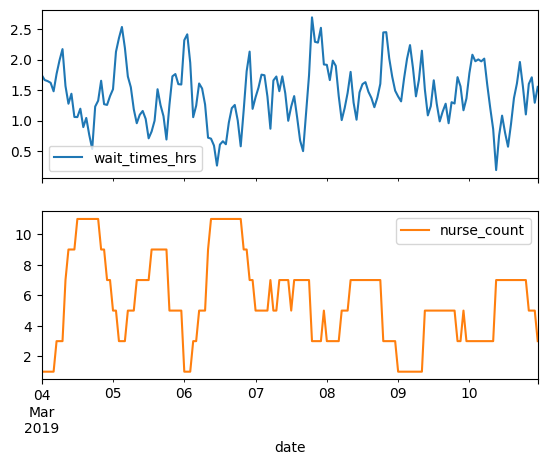

In [27]:
hospital.plot(subplots=True)

In [28]:
hospital['wait_times_hrs'].corr(hospital['nurse_count'])

-0.6413712129394905

In [29]:
# Instantiate the model
model = ARIMA(hospital['wait_times_hrs'],order=(2,0,1),exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -11.834
Date:                Thu, 26 Jan 2023   AIC                             35.668
Time:                        11:46:44   BIC                             54.411
Sample:                    03-04-2019   HQIC                            43.275
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1001      0.086     24.375      0.000       1.931       2.269
nurse_count    -0.1171      0.012     -9.562      0.000      -0.141      -0.093
ar.L1           0.5693      0.169      3.365    

C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


# Earthquakes

In [31]:
from toolbox import series_screw as ss

<AxesSubplot: xlabel='date'>

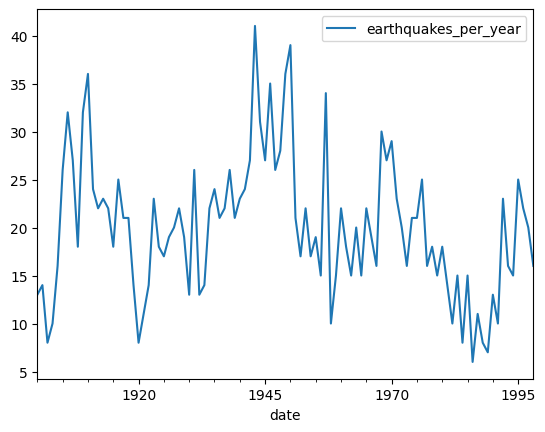

In [33]:
earthquakes.plot()

In [34]:
ss.adfuller_eval_sta(earthquakes)

'p_value: 0.02097842525600371 rejeita-se Ho. Esta séries é estacionária'

C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


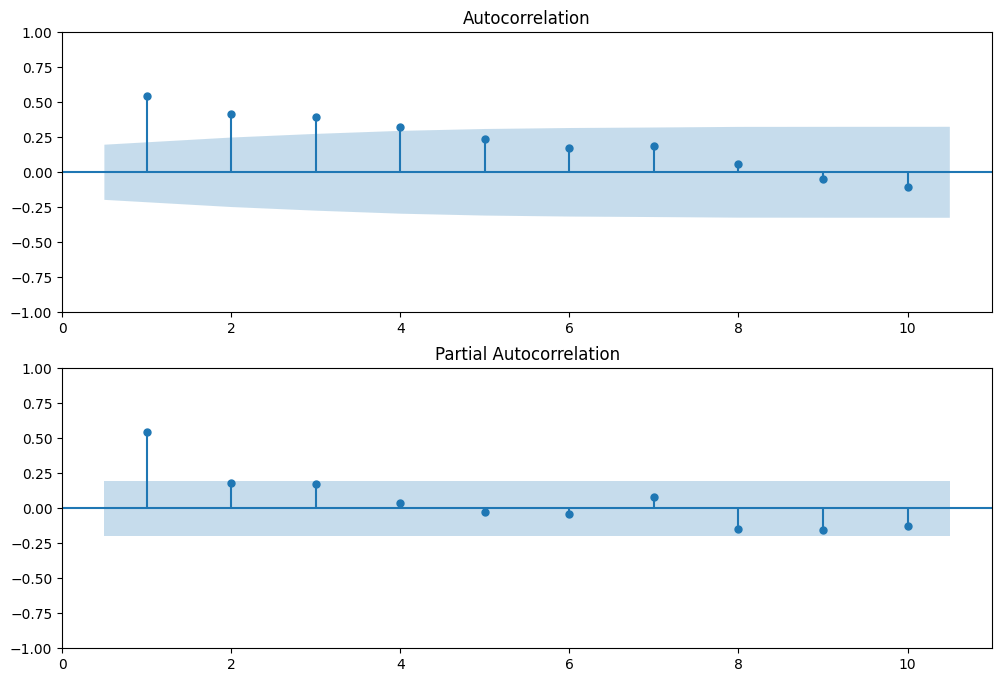

In [36]:
ss.acf_pacf(earthquakes,lags=20)

In [43]:
earthquakes

,earthquakes_per_year
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0
...,...
1994-01-01,15.0
1995-01-01,25.0
1996-01-01,22.0


In [46]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(6):
  # Loop over q values from 0-2
    for q in range(6):
        
            try:
                # create and fit ARMA(p,q) model
                model = ARIMA(earthquakes, order=(p,0,q))
                results = model.fit()

                # Append order and results tuple
                order_aic_bic.append((p,q,results.aic,results.bic))

            except:
                
                order_aic_bic.append((p,q,None,None))
                
            
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Py

    p  q         AIC         BIC
15  2  3  637.816177  655.982016
16  2  4  639.774520  660.535478
7   1  1  640.456284  650.836763
22  3  4  640.571611  663.927690
18  3  0  641.496668  654.472268
17  2  5  641.586526  664.942605
23  3  5  642.173301  668.124500
28  4  4  642.373288  668.324486
8   1  2  642.380867  655.356467
14  2  2  642.468590  658.039309
12  2  0  642.733854  653.114333
9   1  3  643.062669  658.633389
24  4  0  643.282332  658.853051
19  3  1  643.345277  658.915996
6   1  0  643.967677  651.753037
31  5  1  644.524911  665.285870
10  1  4  644.774625  662.940464
21  3  3  645.044791  665.805750
20  3  2  645.190438  663.356277
30  5  0  645.220143  663.385982
25  4  1  645.266099  663.431938
26  4  2  645.901168  666.662126
11  1  5  646.275871  667.036830
32  5  2  646.433164  669.789242
4   0  4  647.129028  662.699747
27  4  3  647.404906  670.760984
13  2  1  647.440665  660.416264
33  5  3  647.447348  673.398547
29  4  5  647.535980  676.082298
5   0  5  

C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Diagnosis

4.56898829488138


C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


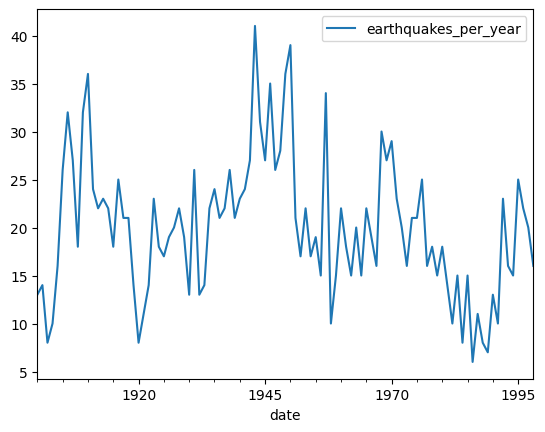

In [53]:
# Fit model
model = ARIMA(earthquakes, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquakes.plot()
plt.show()

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(1, 0, 1)   Log Likelihood                -316.228
Date:                  Thu, 26 Jan 2023   AIC                            640.456
Time:                          13:34:47   BIC                            650.837
Sample:                      01-01-1900   HQIC                           644.656
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6684      2.137      9.202      0.000      15.479      23.858
ar.L1          0.8306      0.084      9.881      0.000       0.666       0.995
ma.L1         -0.4369      0.140     -3.119      0.002      -0.711      -0.162
sigma2        34.6640      4.985      6.953      0.000      24.893      44.435
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.51
Prob(Q):                              0.93   Prob(JB):                         0.06
Heteroskedasticity (H):               0.69   Skew:                             0.56
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

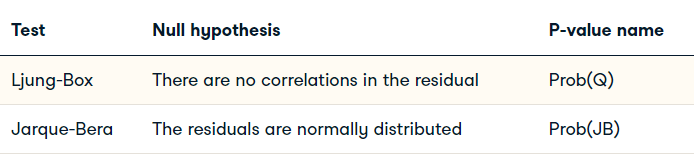

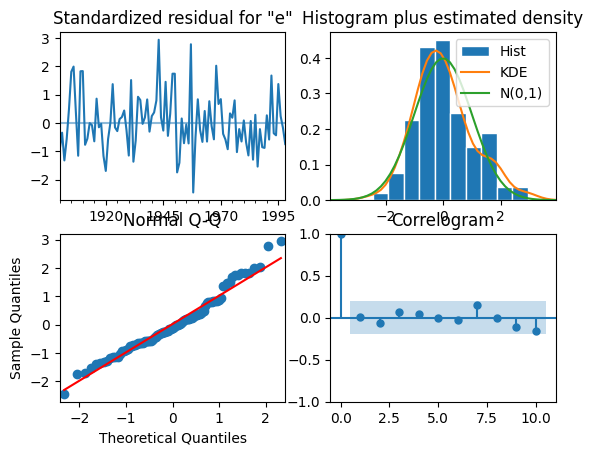

In [56]:
results.plot_diagnostics();

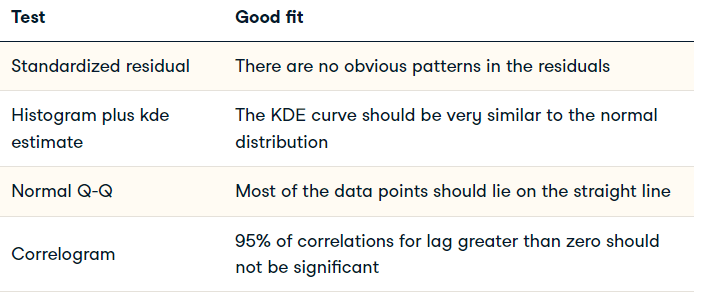

In [ ]:
Não existe correlação entre os resíduos;
É normalmente distribuido

